# The BHS, some basic statistics

In [54]:
import sys, os, csv, collections

import matplotlib.pyplot as plt
import pandas as pd
import statistics

from pprint import pprint

In [4]:
from tf.app import use
A = use('bhsa', hoist=globals())

A.displaySetup(extraFeatures='g_vbe')
A.displaySetup(extraFeatures='g_prs')
A.displaySetup(extraFeatures='g_pfm')
A.displaySetup(extraFeatures='g_vbs')
A.displaySetup(extraFeatures='g_lex')
A.displaySetup(extraFeatures='g_nme')
A.displaySetup(extraFeatures='g_uvf')

### Books

In [5]:
book_count = 0

for bo in F.otype.s('book'):
    book_count += 1
    
print(f'The number of books in the Hebrew Bible is {book_count}.')

The number of books in the Hebrew Bible is 39.


### Verses

In [64]:
verse_count = 0

for ve in F.otype.s('verse'):
    words = L.d(ve, 'word')
    is_language_hebrew = [F.language.v(w) == 'Hebrew' for w in words]
    if all(is_language_hebrew):
        verse_count += 1
    
print(f'The number of verses in the Hebrew Bible is {verse_count}.')

The number of verses in the Hebrew Bible is 22943.


### Words

In [65]:
word_count = 0

for wo in F.otype.s('word'):
    if F.language.v(wo) == 'Hebrew':
        word_count += 1
    
print(f'The number of words in the Hebrew Bible is {word_count}.')

The number of words in the Hebrew Bible is 420478.


### Words per verse

In [66]:
print(f'The average number of words per verse is {round(word_count / verse_count, 1)}.')

The average number of words per verse is 18.3.


In [67]:
print(f'And the standard deviation is {round(statistics.stdev(all_realization_counts), 1)}')

And the standard deviation is 4.0


### Graphical words

In [68]:
words_and_trailers = []

for wo in F.otype.s('word'):
    
    if F.language.v(wo) == 'Aramaic':
        continue
    
    words_and_trailers.append(F.g_cons.v(wo))
    trailer = F.trailer.v(wo)
    if not trailer:
        words_and_trailers.append(trailer)
    else:
        words_and_trailers.append(' ')
    
whole_bible_text = ''.join(words_and_trailers)
all_graphical_words = whole_bible_text.strip().split()

print(f'Number of graphical words in the BHS is {len(all_graphical_words)}.')

Number of graphical words in the BHS is 299961.


In [69]:
print(f'The average number of graphical words per verse is {round(len(all_graphical_words) / verse_count, 1)}.')

The average number of graphical words per verse is 13.1.


Check the whole Bible (Hebrew parts)!

In [70]:
print(whole_bible_text)

BR>CJT BR> >LHJM >T HCMJM W>T H>RY WH>RY HJTH THW WBHW WXCK <L PNJ THWM WRWX >LHJM MRXPT <L PNJ HMJM WJ>MR >LHJM JHJ >WR WJHJ >WR WJR> >LHJM >T H>WR KJ VWB WJBDL >LHJM BJN H>WR WBJN HXCK WJQR> >LHJM L>WR JWM WLXCK QR> LJLH WJHJ <RB WJHJ BQR JWM >XD WJ>MR >LHJM JHJ RQJ< BTWK HMJM WJHJ MBDJL BJN MJM LMJM WJ<F >LHJM >T HRQJ< WJBDL BJN HMJM >CR MTXT LRQJ< WBJN HMJM >CR M<L LRQJ< WJHJ KN WJQR> >LHJM LRQJ< CMJM WJHJ <RB WJHJ BQR JWM CNJ WJ>MR >LHJM JQWW HMJM MTXT HCMJM >L MQWM >XD WTR>H HJBCH WJHJ KN WJQR> >LHJM LJBCH >RY WLMQWH HMJM QR> JMJM WJR> >LHJM KJ VWB WJ>MR >LHJM TDC> H>RY DC> <FB MZRJ< ZR< <Y PRJ <FH PRJ LMJNW >CR ZR<W BW <L H>RY WJHJ KN WTWY> H>RY DC> <FB MZRJ< ZR< LMJNHW W<Y <FH PRJ >CR ZR<W BW LMJNHW WJR> >LHJM KJ VWB WJHJ <RB WJHJ BQR JWM CLJCJ WJ>MR >LHJM JHJ M>RT BRQJ< HCMJM LHBDJL BJN HJWM WBJN HLJLH WHJW L>TT WLMW<DJM WLJMJM WCNJM WHJW LM>WRT BRQJ< HCMJM LH>JR <L H>RY WJHJ KN WJ<F >LHJM >T CNJ HM>RT HGDLJM >T HM>WR HGDL LMMCLT HJWM W>T HM>WR HQVN LMMCLT HLJLH W>T HKWKBJM WJ

### Morphemes and their paradigmatic form

In [71]:
prs_dict = collections.defaultdict(lambda: collections.defaultdict(int))
vbe_dict = collections.defaultdict(lambda: collections.defaultdict(int))
pfm_dict = collections.defaultdict(lambda: collections.defaultdict(int))
nme_dict = collections.defaultdict(lambda: collections.defaultdict(int))
uvf_dict = collections.defaultdict(lambda: collections.defaultdict(int))
lex_dict = collections.defaultdict(lambda: collections.defaultdict(int))

for wo in F.otype.s('word'):
    
    if F.language.v(wo) == 'Aramaic':
        continue
   
    # collect paradigmatic forms of morphemes and their realized forms ('g_' features)
    prs_dict[F.prs.v(wo)][F.g_prs.v(wo)] += 1
    vbe_dict[F.vbe.v(wo)][F.g_vbe.v(wo)] += 1
    pfm_dict[F.pfm.v(wo)][F.g_pfm.v(wo)] += 1
    nme_dict[F.nme.v(wo)][F.g_nme.v(wo)] += 1
    uvf_dict[F.uvf.v(wo)][F.g_uvf.v(wo)] += 1
    lex_dict[F.lex.v(wo)][F.g_lex.v(wo)] += 1    


### Pronominal suffix

In [72]:
prs_df = pd.DataFrame(prs_dict)
prs_df = prs_df.fillna(0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(prs_df)

           absent       n/a       W     HW       M      HM       H     NW  \
         231852.0  144034.0     0.0    0.0     0.0     0.0     0.0    0.0   
+OW           0.0       0.0  7596.0    0.0     0.0     0.0     0.0    0.0   
+W            0.0       0.0  4227.0    1.0     0.0     0.0     3.0    0.0   
+H            0.0       0.0    30.0    3.0     1.0     0.0     8.0    0.0   
+>            0.0       0.0    18.0    0.0     0.0     0.0     0.0    0.0   
+OH           0.0       0.0    26.0    0.0     0.0     0.0     0.0    0.0   
+D            0.0       0.0     1.0    0.0     0.0     0.0     0.0    0.0   
+             0.0       0.0     3.0    0.0     0.0     0.0     1.0    0.0   
+J            0.0       0.0     3.0    0.0     0.0     0.0     0.0    1.0   
+WW           0.0       0.0     1.0    0.0     0.0     0.0     0.0    0.0   
+;HW.         0.0       0.0     0.0  644.0     0.0     0.0     0.0    0.0   
+W.           0.0       0.0     0.0  530.0     0.0     0.0     0.0   29.0   

### Verbal ending

In [44]:
vbe_df = pd.DataFrame(vbe_dict)
vbe_df = vbe_df.fillna(0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vbe_df)

              n/a               H        W      TJ     WN     TM     NH  \
         347838.0      0.0    0.0      0.0     0.0    0.0    0.0    0.0   
[             0.0  49861.0    1.0     23.0     0.0    0.0    0.0    0.0   
[-            0.0      2.0    0.0      0.0     0.0    0.0    0.0    0.0   
[W            0.0     11.0    0.0     39.0     0.0    0.0    0.0    0.0   
[H            0.0      5.0    1.0      8.0     0.0    0.0    0.0    0.0   
[_N>          0.0      1.0    0.0      0.0     0.0    0.0    0.0    0.0   
[>            0.0      1.0    0.0      0.0     0.0    0.0    0.0    0.0   
[_JDRK        0.0      1.0    0.0      0.0     0.0    0.0    0.0    0.0   
[J            0.0      1.0    0.0     15.0     0.0    0.0    0.0    0.0   
[:T@H         0.0      0.0  335.0      0.0     0.0    0.0    0.0    0.0   
[@H           0.0      0.0  905.0      0.0     0.0    0.0    0.0    0.0   
[:AT@H        0.0      0.0   14.0      0.0     0.0    0.0    0.0    0.0   
[@T@H         0.0      0.

### Nominal ending

In [45]:
nme_df = pd.DataFrame(nme_dict)
nme_df = nme_df.fillna(0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nme_df)

              n/a             absent       JM        J       T       H  \
         186376.0       0.0  55828.0      0.0      0.0     0.0     0.0   
/             0.0  120007.0      0.0      2.0    108.0     4.0    15.0   
/H            0.0      11.0      0.0      0.0      0.0     1.0    16.0   
/-            0.0       6.0      0.0      0.0      3.0     0.0     0.0   
/J            0.0      29.0      0.0      1.0     21.0     2.0     1.0   
/T            0.0       3.0      0.0      0.0      0.0  1032.0     2.0   
/K            0.0       1.0      0.0      0.0      0.0     0.0     0.0   
/_XMC         0.0       1.0      0.0      0.0      0.0     0.0     0.0   
/NJ           0.0       1.0      0.0      0.0      0.0     0.0     0.0   
/IJM          0.0       0.0      0.0  12855.0      0.0     0.0     0.0   
/IM           0.0       0.0      0.0   1704.0      0.0     0.0     0.0   
/M            0.0       0.0      0.0     16.0      0.0     0.0     1.0   
/JM           0.0       0.0      0.0  

### Univalent final 

In [46]:
uvf_df = pd.DataFrame(uvf_dict)
uvf_df = uvf_df.fillna(0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(uvf_df)

        absent     W      N      J       H
      417815.0   0.0    0.0    0.0     0.0
~OW        0.0  12.0    0.0    0.0     0.0
~EN.       0.0   0.0  528.0    0.0     0.0
~E         0.0   0.0   91.0    0.0     0.0
~AN.       0.0   0.0    6.0    0.0     0.0
~EN:       0.0   0.0    6.0    0.0     0.0
~N         0.0   0.0    5.0    0.0     0.0
~@N        0.0   0.0    1.0    0.0     0.0
~IJ        0.0   0.0    0.0  945.0     0.0
~IJ-       0.0   0.0    0.0    1.0     0.0
~@H        0.0   0.0    0.0    0.0  1062.0
~          0.0   0.0    0.0    0.0     2.0
~EH        0.0   0.0    0.0    0.0     3.0
~H         0.0   0.0    0.0    0.0     1.0


### Lexemes

Let's calculate some general statistics about the lexemes.

Average number of realized forms of the lexemes:

In [50]:
all_realization_counts = [len(all_values) for all_values in lex_dict.values()]
average_nr_of_realizations = sum(all_realization_counts) / len(all_realization_counts)

print(round(average_nr_of_realizations, 1))

2.7


In [51]:
sorted_realization_counts = sorted(all_realization_counts, reverse=True)

In [52]:
# There are some lexemes with many different realizations in the BHS:

sorted_realization_counts[0:30]

[57,
 56,
 54,
 47,
 45,
 44,
 43,
 42,
 40,
 39,
 39,
 39,
 37,
 37,
 36,
 35,
 35,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 31,
 31,
 31,
 31]

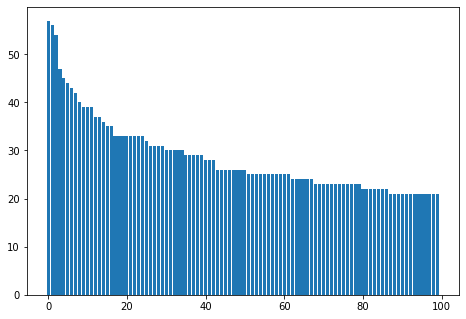

In [57]:
# 100 lexemes with richest realizations.
# This is a long tail phenomenon.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(100), sorted_realization_counts[0:100])
plt.show()

In [58]:
# Which lexemes are these?

for lex, embed_dict in lex_dict.items():
    if len(embed_dict) > 20:
        print(lex)
        pprint(embed_dict)

HJH[
defaultdict(<class 'int'>,
            {'H:AJ': 1,
             'H:EJ': 29,
             'H:EJ;H': 8,
             'H:EJI': 1,
             'H:EJIJ': 12,
             'H:J': 394,
             'H:J;H': 7,
             'H:J;J': 2,
             'H:J@H': 8,
             'H:JEH': 654,
             'H:JEJ': 42,
             'H:JI': 1,
             'H:JIJ': 17,
             'H@J': 480,
             'H@J@H': 738,
             'H@JI': 2,
             'H@JIJ': 137,
             'H@JOH': 2,
             'H@JOW': 4,
             'HIJ': 1006,
             'HJ': 4,
             'HJH': 8,
             'HJJ': 2,
             'HOWJ': 1,
             'JHJ': 1})
>MR[
defaultdict(<class 'int'>,
            {'>:AM@R': 1,
             '>:AM@R:': 2,
             '>:AMAR:': 40,
             '>:AMOR': 2,
             '>:EM@R': 9,
             '>:EM@R:': 3,
             '>:EMAR': 1,
             '>:EMAR:': 1,
             '>:EMIJR': 1,
             '>:EMOR': 53,
             '>@M:R': 124,
             '>@M

             'J@L@D': 10,
             'J@L@D:': 2,
             'J@LAD': 20,
             'J@LAD:': 10,
             'J@LOD': 1,
             'JAL.:D': 6,
             'JAL.ED': 3,
             'JAL.ED:': 1,
             'JAL:D': 1,
             'JLD': 1,
             'JOL:D': 2,
             'JOL;D': 2,
             'JOLAD:': 3,
             'JOLED': 4,
             'JOWL;D': 3,
             'JOWLAD:': 4,
             'JUL.:D': 6,
             'JUL.@D': 1,
             'JUL.AD': 15,
             'JUL.AD:': 2,
             'JW.L.@D': 1,
             'JWLD': 1,
             'L': 1,
             'L.ED': 5,
             'L:D': 3,
             'L;D': 11,
             'LAD:': 3,
             'LD': 1,
             'LED': 71,
             'LID:': 7,
             'LIJD': 9,
             'W.@L:D': 7,
             'W.@L;D': 12,
             'W.@LED': 2,
             'W.L.:D': 2,
             'W.L.AD': 1,
             'W.L.ED': 1,
             'WL;JD': 1,
             'WL@D': 6,
             'WL

             'C.@PW.K:': 1,
             'C.OP:K': 1,
             'C:P.:K': 14,
             'C:P.@K:': 3,
             'C:P.AK:': 3,
             'C:P.OK': 1,
             'C:P.OK:': 24,
             'C:P.OWK:': 5,
             'C:P@K': 1,
             'C:P@K:': 5,
             'C:POK:': 3,
             'C:POWK:': 1,
             'C:PW.K': 2,
             'C@P:K': 4,
             'C@P:K.': 1,
             'C@P@K:': 3,
             'C@PAK:': 19,
             'CIP:K': 3,
             'COP:K': 4,
             'COP;K:': 3,
             'COPEK': 1,
             'COWP;K:': 1,
             'CPK': 2,
             'CUP.AK:': 2,
             'T.AP.;K:': 3})
KRT[
defaultdict(<class 'int'>,
            {'K.:R@T': 2,
             'K.:ROT': 1,
             'K.:RUT': 1,
             'K.@R:T': 7,
             'K.@R;T': 35,
             'K.@RA': 11,
             'K.@RAT': 17,
             'K.@RAT:': 1,
             'K.@RET': 1,
             'K.@ROT': 1,
             'K.IR:T': 4,
             'K.OR:T'

             'Z.OB;XA': 2,
             'Z:B.:X': 29,
             'Z:B.@X': 9,
             'Z:B.AX': 23,
             'Z:B.OWXA': 1,
             'Z:B.OXA': 14,
             'Z:BAX': 1,
             'Z:BAX:': 1,
             'Z:BOXA': 1,
             'Z@B:X': 3,
             'Z@BAX': 2,
             'Z@BAX:': 6,
             'ZAB.:X': 10,
             'ZAB.;X': 3,
             'ZAB.;XA': 6,
             'ZIB.:X': 1,
             'ZIB.;X': 1,
             'ZIB.AX': 1,
             'ZIB:X': 2,
             'ZOB:X': 8,
             'ZOB;XA': 7,
             'ZOWB;XA': 1})
XNN[
defaultdict(<class 'int'>,
            {'X:ANAN:': 1,
             'X:ENAN': 1,
             'X:N': 2,
             'X@N': 2,
             'X@N.': 27,
             'X@N:N': 1,
             'X@N@N': 1,
             'X@NAN': 1,
             'X@NOWN': 1,
             'XAN': 2,
             'XAN.': 1,
             'XAN.:N': 4,
             'XAN.;N': 2,
             'XAN.@N': 4,
             'XAN.AN': 1,
             '

And the standard deviation:

In [59]:
print(statistics.stdev(all_realization_counts))

3.962822161159339


### All lexemes and their realizations

In [60]:
pprint(lex_dict)

defaultdict(<function <lambda> at 0x00000287050D3160>,
            {'<B/': defaultdict(<class 'int'>, {'<AB': 1, '<@B': 29}),
             '<B=/': defaultdict(<class 'int'>, {'<@B': 2, '<UB.': 1}),
             '<B==/': defaultdict(<class 'int'>, {'<@B': 1}),
             '<BC[': defaultdict(<class 'int'>, {'<@B:C': 1}),
             '<BD/': defaultdict(<class 'int'>,
                                 {'<:AB@D': 311,
                                  '<@BED': 6,
                                  '<AB:D': 92,
                                  '<AB:D.': 291,
                                  '<BD': 4,
                                  '<EBED': 96}),
             '<BD=/': defaultdict(<class 'int'>, {'<:AB@D': 1}),
             '<BD==/': defaultdict(<class 'int'>, {'<EBED': 5, '<@BED': 1}),
             '<BD>/': defaultdict(<class 'int'>, {'<AB:D.@>': 2}),
             '<BD>L/': defaultdict(<class 'int'>, {'<AB:D.:>;L': 1}),
             '<BDH/': defaultdict(<class 'int'>,
                 

                                  '<:AN@Q': 1,
                                  '<:ANIJQ': 1}),
             '<NR/': defaultdict(<class 'int'>, {'<@N;R': 2}),
             '<NR=/': defaultdict(<class 'int'>, {'<@N;R': 1}),
             '<NT/': defaultdict(<class 'int'>, {'<:AN@T': 2}),
             '<NTTJ/': defaultdict(<class 'int'>,
                                   {'<:AN.:TOTIJ': 2,
                                    '<:AN.:TOWTIJ': 1,
                                    '<AN.:TOTIJ': 2}),
             '<NTTJH/': defaultdict(<class 'int'>, {'<AN:TOTIJ.@H': 1}),
             '<NTWT/': defaultdict(<class 'int'>,
                                   {'<:AN@TOT': 1,
                                    '<:AN@TOWT': 12}),
             '<NTWT=/': defaultdict(<class 'int'>, {'<:AN@TOWT': 2}),
             '<NW/': defaultdict(<class 'int'>,
                                 {'<:AN@W': 12,
                                  '<AN:W': 3,
                                  '<NJ': 5,
             

             '>BJWNH/': defaultdict(<class 'int'>, {'>:ABIJ.OWN': 1}),
             '>BJXJL/': defaultdict(<class 'int'>,
                                    {'>:ABIJX@JIL': 1,
                                     '>:ABIJXAJIL': 3}),
             '>BJ_<LBWN/': defaultdict(<class 'int'>, {'>:ABIJ_<AL:BOWN': 1}),
             '>BK[': defaultdict(<class 'int'>, {'>AB.:K': 1}),
             '>BL': defaultdict(<class 'int'>, {'>:AB@L': 11}),
             '>BL/': defaultdict(<class 'int'>, {'>@B;L': 3}),
             '>BL=/': defaultdict(<class 'int'>, {'>@B;L': 1}),
             '>BL==/': defaultdict(<class 'int'>, {'>;BEL': 22, '>EB:L': 2}),
             '>BL===/': defaultdict(<class 'int'>,
                                    {'>:AB;L': 5,
                                     '>:ABEL': 1,
                                     '>@B;L': 2}),
             '>BL====/': defaultdict(<class 'int'>, {'>W.BAL': 1, '>UB@L': 2}),
             '>BL=[': defaultdict(<class 'int'>, {'>:EBAL': 1, '>@B:L': 

             '>MRJHW/': defaultdict(<class 'int'>, {'>:AMAR:J@HW.': 3}),
             '>MRPL/': defaultdict(<class 'int'>, {'>AM:R@PEL': 2}),
             '>MR[': defaultdict(<class 'int'>,
                                 {'>:AM@R': 1,
                                  '>:AM@R:': 2,
                                  '>:AMAR:': 40,
                                  '>:AMOR': 2,
                                  '>:EM@R': 9,
                                  '>:EM@R:': 3,
                                  '>:EMAR': 1,
                                  '>:EMAR:': 1,
                                  '>:EMIJR': 1,
                                  '>:EMOR': 53,
                                  '>@M:R': 124,
                                  '>@M;R': 15,
                                  '>@M@R': 3,
                                  '>@M@R:': 2,
                                  '>@MAR': 753,
                                  '>@MAR:': 254,
                                  '>@MER': 1,
  

                                  '>@X:AZ': 6,
                                  '>@XAZ': 5,
                                  '>@XAZ:': 2,
                                  '>@XUZ': 5,
                                  '>@XW.Z': 1,
                                  '>EX:@Z': 1,
                                  '>EX:EZ': 1,
                                  '>OX;Z': 1,
                                  '>OXEZ': 1,
                                  '>X:AZ': 8,
                                  '>X:EZ': 1,
                                  '>X;Z': 6,
                                  '>XEZ': 2,
                                  'X:AZ': 2,
                                  'X;Z': 1,
                                  'XEZ': 1}),
             '>Y<DH/': defaultdict(<class 'int'>, {'>EY:<@D': 2}),
             '>YB</': defaultdict(<class 'int'>,
                                  {'>AY:B.@<': 1,
                                   '>EY:B.:<': 11,
                                   '>EY:B.@<': 

                                 'B.;N': 92,
                                 'B.@N': 293,
                                 'B.EN': 1260,
                                 'B.IN': 32,
                                 'B.IN:': 24,
                                 'B:N': 926,
                                 'B;N': 28,
                                 'B@N': 245,
                                 'BEN': 303,
                                 'BIN': 1,
                                 'BIN:': 16,
                                 'BN': 9}),
             'BN<>/': defaultdict(<class 'int'>, {'B.IN:<@>': 2}),
             'BN=/': defaultdict(<class 'int'>, {'B.;N': 1}),
             'BNH[': defaultdict(<class 'int'>,
                                 {'B.:N': 8,
                                  'B.:N;H': 3,
                                  'B.:NIJ': 1,
                                  'B.:NW.J': 2,
                                  'B.@N': 15,
                                  'B.@N@H': 39,
  

                                  'CA<AR': 156}),
             'C<R=/': defaultdict(<class 'int'>, {'C:<@R': 1}),
             'C<R==/': defaultdict(<class 'int'>, {'C.O<@R': 1}),
             'C<RJH/': defaultdict(<class 'int'>, {'C:<AR:J@H': 2}),
             'C<RJM/': defaultdict(<class 'int'>,
                                   {'CA<:AR@JIM': 1,
                                    'CA<:ARAJIM': 2}),
             'C<RWR/': defaultdict(<class 'int'>, {'CA<:ARW.R': 2}),
             'C<RWRJ/': defaultdict(<class 'int'>,
                                    {'C<RJRJ': 1,
                                     'CA<:ARURI': 1}),
             'C<R[': defaultdict(<class 'int'>, {'C@<AR': 1}),
             'C<VH/': defaultdict(<class 'int'>, {'CA<:AV': 1}),
             'C<VNZ/': defaultdict(<class 'int'>, {'CA<AV:N;Z': 2}),
             'C>B[': defaultdict(<class 'int'>,
                                 {'C.O>:AB': 1,
                                  'C:>:AB': 4,
                            

                                    'C:LOMOH': 292}),
             'CLMJ/': defaultdict(<class 'int'>, {'C.IL.;MIJ': 1}),
             'CLMJ=/': defaultdict(<class 'int'>, {'C:LOMIJ': 1}),
             'CLMJ==/': defaultdict(<class 'int'>, {'CMLJ': 1, 'CAL:M@J': 1}),
             'CLMJ>L/': defaultdict(<class 'int'>, {'C:LUMIJ>;L': 5}),
             'CLMJH/': defaultdict(<class 'int'>, {'CELEM:J@H': 5}),
             'CLMJHW/': defaultdict(<class 'int'>, {'CELEM:J@HW.': 5}),
             'CLMJT/': defaultdict(<class 'int'>,
                                   {'C:LOMIJT': 5,
                                    'C:LOWMIJT': 1,
                                    'CLMWT': 2}),
             'CLMN/': defaultdict(<class 'int'>, {'CAL:MAN': 1}),
             'CLMN>SR/': defaultdict(<class 'int'>, {'CAL:MAN:>ESER': 2}),
             'CLMNJM/': defaultdict(<class 'int'>, {'CAL:MON': 1}),
             'CLMWT/': defaultdict(<class 'int'>, {'C:LOMOWT': 3}),
             'CLM[': defaultdict(<class 

                                  'CEVEP': 2}),
             'CVP[': defaultdict(<class 'int'>,
                                 {'C.@V:P': 1,
                                  'C.@V;P': 1,
                                  'C.OWV;P': 1,
                                  'C:V:P': 4,
                                  'C:V@P': 2,
                                  'C:VOP': 5,
                                  'C:VOWP': 1,
                                  'C@VAP': 4,
                                  'COV:P': 1,
                                  'COV;P': 1,
                                  'COWV;P': 9,
                                  'CUV.AP': 1}),
             'CVR[': defaultdict(<class 'int'>,
                                 {'C.OV:R': 4,
                                  'C.OWV;R': 1,
                                  'COV:R': 19,
                                  'COV;R': 1}),
             'CVV/': defaultdict(<class 'int'>, {'COV;V': 1}),
             'CVX[': defaultdict(<class 'i

             'DRD</': defaultdict(<class 'int'>, {'DAR:D.A<': 1}),
             'DRDR/': defaultdict(<class 'int'>, {'DAR:D.AR': 2}),
             'DRJWC/': defaultdict(<class 'int'>,
                                   {'D.@R:J@WEC': 2,
                                    'D@R:J@WEC': 8}),
             'DRK/': defaultdict(<class 'int'>,
                                 {'D.:R@K': 63,
                                  'D.@REK:': 33,
                                  'D.AR:K': 29,
                                  'D.AR:K.': 85,
                                  'D.EREK': 1,
                                  'D.EREK:': 281,
                                  'D:R@K': 45,
                                  'D@REK:': 12,
                                  'DAR:K': 21,
                                  'DAR:K.': 33,
                                  'DEREK:': 96,
                                  'DRK': 7}),
             'DRKMNJM/': defaultdict(<class 'int'>,
                                  

             'GBN/': defaultdict(<class 'int'>, {'GIB.;N': 1}),
             'GBNH/': defaultdict(<class 'int'>, {'G.:BIN.': 1}),
             'GBNN/': defaultdict(<class 'int'>, {'G.AB:NUN.': 2}),
             'GBR/': defaultdict(<class 'int'>,
                                 {'G.:B@R': 10,
                                  'G.:BAR': 1,
                                  'G.@BER': 10,
                                  'G.EBER': 28,
                                  'G:B@R': 1,
                                  'G@BER': 4,
                                  'GEBER': 12}),
             'GBR=/': defaultdict(<class 'int'>, {'G.EBER': 2}),
             'GBR==/': defaultdict(<class 'int'>, {'GIB.@R': 1}),
             'GBRJ>L/': defaultdict(<class 'int'>, {'G.AB:RIJ>;L': 2}),
             'GBRT/': defaultdict(<class 'int'>,
                                  {'G.:BER': 1,
                                   'G.:BIR:': 7,
                                   'G:B@R': 1}),
             'GBR[': def

                                   'GEZER': 1}),
             'GZR=[': defaultdict(<class 'int'>, {'G:ZOR': 1}),
             'GZRH/': defaultdict(<class 'int'>, {'G.:Z;R': 1}),
             'GZRH=/': defaultdict(<class 'int'>, {'G.IZ:R': 8}),
             'GZRJ/': defaultdict(<class 'int'>, {'GRZJ': 1}),
             'GZR[': defaultdict(<class 'int'>,
                                 {'G.:ZOR': 1,
                                  'G.@ZAR': 1,
                                  'G.IZ:R': 1,
                                  'G:Z:R': 1,
                                  'G:Z@R': 1,
                                  'G:Z@R:': 1,
                                  'G:ZAR': 4,
                                  'G:ZAR:': 1,
                                  'GOZ;R': 1}),
             'GZWNJ/': defaultdict(<class 'int'>, {'G.IZOWNIJ': 1}),
             'GZZ/': defaultdict(<class 'int'>, {'G.@Z;Z': 2}),
             'GZZ[': defaultdict(<class 'int'>,
                                 {'G.@Z.': 

                                  'W.@C;<A': 5,
                                  'W.@CA<': 2,
                                  'WC;<A': 2,
                                  'WC@<': 2,
                                  'WC@<:': 1,
                                  'WCA<': 13,
                                  'WCA<:': 14,
                                  'WCI<': 5,
                                  'WCI<:A': 1,
                                  'WCI<A': 3,
                                  'WCIJ<': 74,
                                  'WCIJ<:A': 3,
                                  'WCIJ<A': 59}),
             'JCB<M/': defaultdict(<class 'int'>, {'J@C@B:<@M': 3}),
             'JCB>B/': defaultdict(<class 'int'>, {'JECEB:>@B': 1}),
             'JCBJ/': defaultdict(<class 'int'>, {'J.@CW.BIJ': 1}),
             'JCBJ=/': defaultdict(<class 'int'>, {'JCBW': 1}),
             'JCBJ_LXM/': defaultdict(<class 'int'>, {'J@CUBIJ_L@XEM': 1}),
             'JCBQ/': defaultdict(<class 'int'

                                   'J@QOWC': 1,
                                   'J@QW.C': 2}),
             'JQWD/': defaultdict(<class 'int'>, {'J.@QW.D': 1}),
             'JQWM/': defaultdict(<class 'int'>, {'J:QW.M': 3}),
             'JQWTJ>L/': defaultdict(<class 'int'>, {'J:QW.TIJ>;L': 1}),
             'JQWV/': defaultdict(<class 'int'>, {'J@QOWV': 1}),
             'JQY[': defaultdict(<class 'int'>,
                                 {'JQ@Y': 1,
                                  'JQAY': 4,
                                  'JQEY': 1,
                                  'Q:Y': 1,
                                  'Q@Y': 1,
                                  'QAY': 3}),
             'JR<[': defaultdict(<class 'int'>, {'J@R:<': 1}),
             'JR>/': defaultdict(<class 'int'>,
                                 {'J.@R;>': 1,
                                  'J:R;>': 21,
                                  'J@R;>': 4,
                                  'JIR:>': 14,
                  

             'K>H[': defaultdict(<class 'int'>,
                                 {'K:>': 1,
                                  'K:>;H': 1,
                                  'K:>@H': 1}),
             'KBC/': defaultdict(<class 'int'>, {'KEBEC': 1}),
             'KBCN/': defaultdict(<class 'int'>, {'K.IB:C@N': 4}),
             'KBC[': defaultdict(<class 'int'>,
                                 {'K.IB.;C': 1,
                                  'K:B.:C': 5,
                                  'K:B.@C': 1,
                                  'K:B.OC': 2,
                                  'K:B.OWC': 1,
                                  'K@B:C': 1,
                                  'KBJC': 1,
                                  'KIB:C': 1,
                                  'KOB:C': 1}),
             'KBD/': defaultdict(<class 'int'>,
                                 {'K.:B;D': 1,
                                  'K.@B;D': 25,
                                  'K.EBED': 1,
                        

             'KSLXJM/': defaultdict(<class 'int'>, {'K.AS:LUX': 2}),
             'KSL[': defaultdict(<class 'int'>, {'K:S@L': 1}),
             'KSMJM/': defaultdict(<class 'int'>, {'KUS.:M': 1}),
             'KSMT/': defaultdict(<class 'int'>, {'K.US.EM': 1, 'KUS.EM': 1}),
             'KSM[': defaultdict(<class 'int'>, {'K.@SOWM': 1, 'K:S:M': 1}),
             'KSP/': defaultdict(<class 'int'>,
                                 {'K.@SEP': 50,
                                  'K.AS:P.': 26,
                                  'K.ESEP': 233,
                                  'K@SEP': 11,
                                  'KAS:P.': 6,
                                  'KESEP': 77}),
             'KSPJ>/': defaultdict(<class 'int'>, {'K@SIP:J@>': 2}),
             'KSP[': defaultdict(<class 'int'>,
                                 {'K:S:P': 1,
                                  'K:S@P': 1,
                                  'K:SAP:': 1,
                                  'K:SOP': 2,
       

                                  'LAXAC': 1}),
             'LXC[': defaultdict(<class 'int'>, {'LAX:AC': 3}),
             'LXJ/': defaultdict(<class 'int'>,
                                 {'L.:X@J': 1,
                                  'L.:XIJ': 2,
                                  'L.EXIJ': 2,
                                  'L:X': 1,
                                  'L:X@J': 7,
                                  'L:XIJ': 3,
                                  'LEX:EJ': 2,
                                  'LEXIJ': 3}),
             'LXJ=/': defaultdict(<class 'int'>, {'L.EXIJ': 3, 'LEXIJ': 1}),
             'LXJ_R>J/': defaultdict(<class 'int'>, {'LAXAJ_RO>IJ': 3}),
             'LXK[': defaultdict(<class 'int'>,
                                 {'L:XOK:': 1,
                                  'LAX:AK': 2,
                                  'LAX;K': 2,
                                  'LIX;K': 1}),
             'LXM/': defaultdict(<class 'int'>,
                                 {

             'MGDWL/': defaultdict(<class 'int'>, {'MGDJL': 1}),
             'MGL/': defaultdict(<class 'int'>, {'MAG.@L': 2}),
             'MGLH/': defaultdict(<class 'int'>, {'M:GIL.': 8, 'M.:GIL.': 13}),
             'MGMT/': defaultdict(<class 'int'>, {'M:GAM.': 1}),
             'MGN/': defaultdict(<class 'int'>,
                                 {'M.@G;N': 3,
                                  'M.@GIN.': 2,
                                  'M@G;N': 30,
                                  'M@GIN.': 24}),
             'MGN=/': defaultdict(<class 'int'>, {'M@GIN.': 2, 'M@G;N': 2}),
             'MGNH/': defaultdict(<class 'int'>, {'M:GIN.': 1}),
             'MGN[': defaultdict(<class 'int'>,
                                 {'MAG.:N': 1,
                                  'MAG.EN:': 1,
                                  'MIG.;N': 1}),
             'MGPH/': defaultdict(<class 'int'>, {'MAG.;P': 9, 'M.AG.;P': 17}),
             'MGPJ<C/': defaultdict(<class 'int'>, {'MAG:P.IJ<@C': 1}),


             'MR>H=/': defaultdict(<class 'int'>, {'MAR:>': 6, 'M.AR:>': 6}),
             'MR>H==/': defaultdict(<class 'int'>, {'MUR:>': 1}),
             'MR>[': defaultdict(<class 'int'>, {'M:RIJ>': 1}),
             'MRB/': defaultdict(<class 'int'>, {'M;RAB': 3}),
             'MRBDJM/': defaultdict(<class 'int'>, {'MAR:BAD.': 2}),
             'MRBH/': defaultdict(<class 'int'>, {'MRBH': 1, 'MAR:B.EH': 1}),
             'MRBH=/': defaultdict(<class 'int'>, {'MIR:B.': 1}),
             'MRBJT/': defaultdict(<class 'int'>, {'MAR:B.IJT': 5}),
             'MRBQ/': defaultdict(<class 'int'>, {'MAR:B.;Q': 4}),
             'MRBY/': defaultdict(<class 'int'>, {'MIR:B.AY': 1}),
             'MRBY=/': defaultdict(<class 'int'>, {'MAR:B.;Y': 1}),
             'MRC<T/': defaultdict(<class 'int'>, {'M.IR:CA<': 1}),
             'MRCH/': defaultdict(<class 'int'>, {'M@R;C@H': 1}),
             'MRCH=/': defaultdict(<class 'int'>,
                                   {'M.@R;C@H': 1,
          

                                  'MOYA>': 1,
                                  'MY>': 2}),
             'MYB/': defaultdict(<class 'int'>,
                                 {'M.AY.@B': 2,
                                  'M.AY.AB': 1,
                                  'MAY.AB': 7}),
             'MYB=/': defaultdict(<class 'int'>, {'MUY.@B': 2}),
             'MYBH/': defaultdict(<class 'int'>,
                                  {'M.AY.;B': 6,
                                   'MAY.:B': 5,
                                   'MAY.;B': 21}),
             'MYBH=/': defaultdict(<class 'int'>, {'M.AY.@B': 1}),
             'MYBJH/': defaultdict(<class 'int'>, {'M.:YOB@J@H': 1}),
             'MYBT/': defaultdict(<class 'int'>,
                                  {'M.AY.EB': 1,
                                   'MAY.AB:': 1,
                                   'MAY.EB': 4}),
             'MYD/': defaultdict(<class 'int'>,
                                 {'M.:Y@D': 6,
                        

                                  'NAG.:X': 1,
                                  'NAG.;XA': 2,
                                  'NAG.AX': 4}),
             'NH/': defaultdict(<class 'int'>, {'NOH.A': 1}),
             'NHG=[': defaultdict(<class 'int'>, {'NAH:AG': 1}),
             'NHG[': defaultdict(<class 'int'>,
                                 {'N:H:AG': 2,
                                  'N:H@G': 2,
                                  'N:H@G:A': 1,
                                  'N:HAG': 7,
                                  'N:HW.G': 1,
                                  'N@H:AG': 1,
                                  'N@HAG': 1,
                                  'NAH:AG': 4,
                                  'NAH;G': 3,
                                  'NAHEG:': 1,
                                  'NIHAG': 1,
                                  'NIHAG:': 1,
                                  'NOH:AG': 2,
                                  'NOH;G': 3}),
             'NHH=[': defa

             'NXMJM/': defaultdict(<class 'int'>, {'NIXUM': 2, 'NIXW.M': 1}),
             'NXMNJ/': defaultdict(<class 'int'>, {'NAX:AM@NIJ': 1}),
             'NXM[': defaultdict(<class 'int'>,
                                 {'N.@X:AM': 2,
                                  'N.@X;M': 16,
                                  'N.@XEM': 7,
                                  'N.EX@M:': 1,
                                  'NAX:AM': 28,
                                  'NAX;M': 14,
                                  'NAXEM:': 2,
                                  'NEX@M': 4,
                                  'NIX:AM': 1,
                                  'NIXAM': 5,
                                  'NIXAM:': 3,
                                  'NUX@M': 2,
                                  'X@M': 7,
                                  'X@M:': 1,
                                  'XAM': 5,
                                  'XAM:': 10}),
             'NXNW': defaultdict(<class 'int'>, {'N@X:NW.'

             'PRDH/': defaultdict(<class 'int'>, {'P.IR:D.': 3}),
             'PRDS/': defaultdict(<class 'int'>,
                                  {'P.AR:D.;S': 2,
                                   'PAR:D.;S': 1}),
             'PRDWT/': defaultdict(<class 'int'>, {'P:RUD': 1}),
             'PRD[': defaultdict(<class 'int'>,
                                 {'P.:RUD': 1,
                                  'P.@R:D': 3,
                                  'P.@R;D': 3,
                                  'P.@R@D': 2,
                                  'P.@RED': 2,
                                  'P:R:D': 2,
                                  'P:R@D': 4,
                                  'P:RID': 1,
                                  'P:RIJD': 6,
                                  'P@R;D': 1,
                                  'POR@D': 1}),
             'PRFZ/': defaultdict(<class 'int'>, {'P.AR:C;Z': 1}),
             'PRF[': defaultdict(<class 'int'>,
                                 {'P.:RU

                                  {'Q.:DOC': 1,
                                   'Q.:DOWC': 2,
                                   'Q.@DOWC': 4,
                                   'Q:DOC': 22,
                                   'Q:DOWC': 37,
                                   'Q@DOC': 14,
                                   'Q@DOWC': 35,
                                   'QDC': 1}),
             'QDWMJM/': defaultdict(<class 'int'>, {'Q:DW.M': 1}),
             'QDXT/': defaultdict(<class 'int'>, {'Q.AD.AX': 2}),
             'QDX[': defaultdict(<class 'int'>,
                                 {'Q:DAX:': 1,
                                  'Q:DOXA': 1,
                                  'Q@D:X': 2,
                                  'QOD:X': 1}),
             'QFJVH/': defaultdict(<class 'int'>, {'Q:FIJV': 3}),
             'QFQFT/': defaultdict(<class 'int'>,
                                   {'QAF:Q:F': 2,
                                    'QAF:QAF.': 1,
                           

                                  'QOY;P': 1}),
             'QYR/': defaultdict(<class 'int'>, {'Q.OYER': 1}),
             'QYR=/': defaultdict(<class 'int'>, {'QIY:R': 2, 'Q:YAR': 3}),
             'QYR=[': defaultdict(<class 'int'>,
                                  {'Q.OWY:R': 5,
                                   'Q.OY:R': 2,
                                   'Q.OY;R': 2,
                                   'Q:Y:R': 2,
                                   'Q:YAR:': 2,
                                   'Q:YOR': 6,
                                   'Q:YOWR': 4,
                                   'Q@Y@R': 1,
                                   'QIY:R': 3,
                                   'QOWY;R': 1,
                                   'QOY:R': 1,
                                   'QUY:R': 3,
                                   'QYJR': 1,
                                   'QYWR': 1}),
             'QYR[': defaultdict(<class 'int'>,
                                 {'Q:Y@R': 1,
    

                                  'R@W': 1,
                                  'RAJ.@W': 1,
                                  'RAW.': 1,
                                  'RAW.;H': 1,
                                  'RIW.': 2,
                                  'RIW.;J': 1}),
             'RWJH/': defaultdict(<class 'int'>, {'R:W@J': 2}),
             'RWM/': defaultdict(<class 'int'>, {'ROWM': 1}),
             'RWM=/': defaultdict(<class 'int'>, {'RW.M': 5, 'RUM': 1}),
             'RWMH/': defaultdict(<class 'int'>, {'ROWM': 1}),
             'RWMH=/': defaultdict(<class 'int'>, {'RW.M@H': 2}),
             'RWMM/': defaultdict(<class 'int'>, {'ROWMAM': 1, 'ROWM:M': 1}),
             'RWMMT/': defaultdict(<class 'int'>, {'ROWM:MUT': 1}),
             'RWM[': defaultdict(<class 'int'>,
                                 {'R;M': 5,
                                  'R;MO': 1,
                                  'R@M': 39,
                                  'R@M.': 1,
                      

                                  'SW.S': 95,
                                  'SWS': 1}),
             'SWSH/': defaultdict(<class 'int'>, {'SUS': 1}),
             'SWSJ/': defaultdict(<class 'int'>, {'SW.SIJ': 1}),
             'SWT/': defaultdict(<class 'int'>, {'SWT': 1}),
             'SWT[': defaultdict(<class 'int'>,
                                 {'S.IJT': 6,
                                  'SAT.': 1,
                                  'SET': 2,
                                  'SIJT': 9}),
             'SWVJ/': defaultdict(<class 'int'>, {'SOVAJ': 1, 'SOWVAJ': 1}),
             'SWX/': defaultdict(<class 'int'>, {'SW.XA': 1}),
             'SWXH/': defaultdict(<class 'int'>, {'S.W.X': 1}),
             'SXBWT/': defaultdict(<class 'int'>, {'HSXB': 1, 'S.:X@B': 1}),
             'SXB[': defaultdict(<class 'int'>,
                                 {'S:X@B': 2,
                                  'S:XOB': 1,
                                  'S@XAB:': 1,
                      

                                  'T.AM': 3,
                                  'T.AM.': 12,
                                  'T.AM.@M': 2,
                                  'T.AM:': 2,
                                  'T.OM': 15,
                                  'T.UM': 1,
                                  'T.UM.': 8,
                                  'T;M': 2,
                                  'T@M': 1,
                                  'T@M:': 1,
                                  'TAM': 1,
                                  'TAM.': 5,
                                  'TIM': 1,
                                  'TIM.O': 1,
                                  'TM': 1}),
             'TMN</': defaultdict(<class 'int'>,
                                  {'T.IM:N@<': 4,
                                   'TIM:N@<': 1,
                                   'TIM:NA<': 1}),
             'TMNH/': defaultdict(<class 'int'>,
                                  {'T.IM:N': 4,
                        

                                  'X@B:C': 1,
                                  'X@BAC:': 1,
                                  'X@BW.C': 1,
                                  'XAB.;C': 1,
                                  'XIB.;C': 1,
                                  'XIB:C': 2,
                                  'XOB;C': 1,
                                  'XUB.:C': 1,
                                  'XUB.@C': 1}),
             'XBH/': defaultdict(<class 'int'>, {'XBH': 1}),
             'XBH[': defaultdict(<class 'int'>,
                                 {'X:ABIJ': 1,
                                  'X:B.@H': 1,
                                  'X@B;H': 2}),
             'XBJH/': defaultdict(<class 'int'>, {'X:@BAJ.@H': 2}),
             'XBJWN/': defaultdict(<class 'int'>, {'XEB:JOWN': 1}),
             'XBL/': defaultdict(<class 'int'>,
                                 {'X:AB@L': 5,
                                  'X;BEL': 1,
                                  'XEB:L': 1}),
  

                                  'XUM:Y': 1}),
             'XN/': defaultdict(<class 'int'>, {'X;N': 68, 'XIN.': 1}),
             'XN=/': defaultdict(<class 'int'>, {'X;N': 1}),
             'XNDD/': defaultdict(<class 'int'>, {'X;N@D@D': 4}),
             'XNH/': defaultdict(<class 'int'>, {'XAN.@H': 13}),
             'XNH=[': defaultdict(<class 'int'>, {'XAN.': 1}),
             'XNH[': defaultdict(<class 'int'>,
                                 {'X:AN': 103,
                                  'X:AN;H': 1,
                                  'X:ANEH': 2,
                                  'X@N': 4,
                                  'X@N@H': 2,
                                  'X@NIJ': 2,
                                  'XAN': 10,
                                  'XON': 15,
                                  'XONEH': 2,
                                  'XOWN': 2}),
             'XNJ>L/': defaultdict(<class 'int'>, {'XAN.IJ>;L': 2}),
             'XNJK/': defaultdict(<class 'int'>,

                                  'X:EZEJ': 3,
                                  'X@Z': 6,
                                  'X@Z@H': 7,
                                  'X@ZIJ': 4,
                                  'XAZ': 1,
                                  'XOZ': 4,
                                  'XOZEH': 1}),
             'XZJ>L/': defaultdict(<class 'int'>, {'X:AZIJ>;L': 1}),
             'XZJH/': defaultdict(<class 'int'>, {'X:AZ@J@H': 1}),
             'XZJR/': defaultdict(<class 'int'>, {'X:AZIJR': 7}),
             'XZJR=/': defaultdict(<class 'int'>, {'X;ZIJR': 2}),
             'XZJWN/': defaultdict(<class 'int'>,
                                   {'XEZ:JON': 4,
                                    'XEZ:JOWN': 2,
                                    'XIZ.@JOWN': 3}),
             'XZJWN=/': defaultdict(<class 'int'>, {'XEZ:JOWN': 1}),
             'XZJZ/': defaultdict(<class 'int'>, {'X:AZIJZ': 3}),
             'XZQ/': defaultdict(<class 'int'>,
                         

                                  'Z.@<;Q': 3,
                                  'Z:<:AQ': 15,
                                  'Z:<;Q': 4,
                                  'Z:<@Q': 9,
                                  'Z:<@Q:': 1,
                                  'Z:<AQ': 18,
                                  'Z:<AQ:': 1,
                                  'Z:<EQ': 1,
                                  'Z:<IJQ': 2,
                                  'Z:<OQ': 1,
                                  'Z<Q': 1,
                                  'Z@<:AQ': 7,
                                  'Z@<@Q': 1,
                                  'Z@<AQ:': 1,
                                  'ZA<:AQ': 6}),
             'Z<WH/': defaultdict(<class 'int'>, {'ZA<:AW': 2, 'ZW<': 5}),
             'Z<WN/': defaultdict(<class 'int'>, {'ZA<:AW@N': 2}),
             'Z>B/': defaultdict(<class 'int'>, {'Z:>;B': 6, 'Z.:>;B': 1}),
             'Z>B=/': defaultdict(<class 'int'>, {'Z:>;B': 6}),
             'Z>T'